# Data Wrangling II

Para este novo exceriso de Data Wrangling é proposto conectar uma base desde SQLite, na qual, a partir dessa base de dados brutos irei comprender as características, para assim manipular o set de dados com o fim de extrair informação dele.

#### 1. Ler os dados do bando e extrair ambas tabelas

In [1]:
#importando as librerias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import sqlite3

In [2]:
#Conectando com o banco de dados
sqliteBase = sqlite3.connect("archive/nba_salary.sqlite")

#Dividindo o banco de dados pelas tabelas "Seasons_Stats" e "NBA_season1718_salary"
SeasonsStatsDF = pd.read_sql_query("SELECT * from Seasons_Stats", sqliteBase)
NBASalaryDF = pd.read_sql_query("SELECT * from NBA_season1718_salary", sqliteBase)

In [3]:
#Verificando as tabelas carregadas
SeasonsStatsDF.head(15)

,X1,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,0.0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,...,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0
1,1.0,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,...,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0
2,2.0,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,...,0.698,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0
3,3.0,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,...,0.559,NaN,NaN,NaN,20.0,NaN,NaN,NaN,29.0,63.0
4,4.0,1950.0,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,NaN,...,0.548,NaN,NaN,NaN,20.0,NaN,NaN,NaN,27.0,59.0
5,5.0,1950.0,Ed Bartels,F,24.0,NYK,2.0,NaN,NaN,NaN,...,0.667,NaN,NaN,NaN,0.0,NaN,NaN,NaN,2.0,4.0
6,6.0,1950.0,Ralph Beard,G,22.0,INO,60.0,NaN,NaN,NaN,...,0.762,NaN,NaN,NaN,233.0,NaN,NaN,NaN,132.0,895.0
7,7.0,1950.0,Gene Berce,G-F,23.0,TRI,3.0,NaN,NaN,NaN,...,0.000,NaN,NaN,NaN,2.0,NaN,NaN,NaN,6.0,10.0
8,8.0,1950.0,Charlie Black,F-C,28.0,TOT,65.0,NaN,NaN,NaN,...,0.651,NaN,NaN,NaN,163.0,NaN,NaN,NaN,273.0,661.0
9,9.0,1950.0,Charlie Black,F-C,28.0,FTW,36.0,NaN,NaN,NaN,...,0.632,NaN,NaN,NaN,75.0,NaN,NaN,NaN,140.0,382.0


In [4]:
NBASalaryDF.head(15)

,X1,Player,Tm,season17_18
0,1.0,Stephen Curry,GSW,34682550.0
1,2.0,LeBron James,CLE,33285709.0
2,3.0,Paul Millsap,DEN,31269231.0
3,4.0,Gordon Hayward,BOS,29727900.0
4,5.0,Blake Griffin,DET,29512900.0
5,6.0,Kyle Lowry,TOR,28703704.0
6,7.0,Russell Westbrook,OKC,28530608.0
7,8.0,Mike Conley,MEM,28530608.0
8,9.0,James Harden,HOU,28299399.0
9,10.0,DeMar DeRozan,TOR,27739975.0


#### 2. Verificar quantos dados nulos estão presentes em cada tabela. Analisar quais colunas e linhas você eliminaria.

In [5]:
#Analisando se há dados nulos dentro da tabela de salarios
NBASalaryDF.isnull().sum()

X1             0
Player         0
Tm             0
season17_18    0
dtype: int64

Para a tabela de salários não há dados nulos, porém não seria necessário descartar nenhuma coluna ou linha

In [6]:
#Analisando se há dados nulos dentro da tabela de salarios
SeasonsStatsDF.isnull().sum()

X1            0
Year         67
Player       67
Pos          67
Age          75
Tm           67
G            67
GS        18444
MP          553
PER         590
TS%         153
3PAr      21239
FTr         166
ORB%      23714
DRB%      24320
TRB%      24436
AST%      23926
STL%      22672
BLK%      21652
TOV%      24241
USG%      24633
blanl     24691
OWS         106
DWS         106
WS          106
WS/48       590
blank2    24691
OBPM      24191
DBPM      23975
BPM       24279
VORP      21604
FG           67
FGA          67
FG%         166
3P        16021
3PA       19516
3P%       20893
2P           67
2PA          67
2P%         195
eFG%        166
FT           67
FTA          67
FT%         925
ORB       23158
DRB       23956
TRB         379
AST          67
STL       22794
BLK       21000
TOV       23761
PF           67
PTS          67
dtype: int64

<AxesSubplot:>

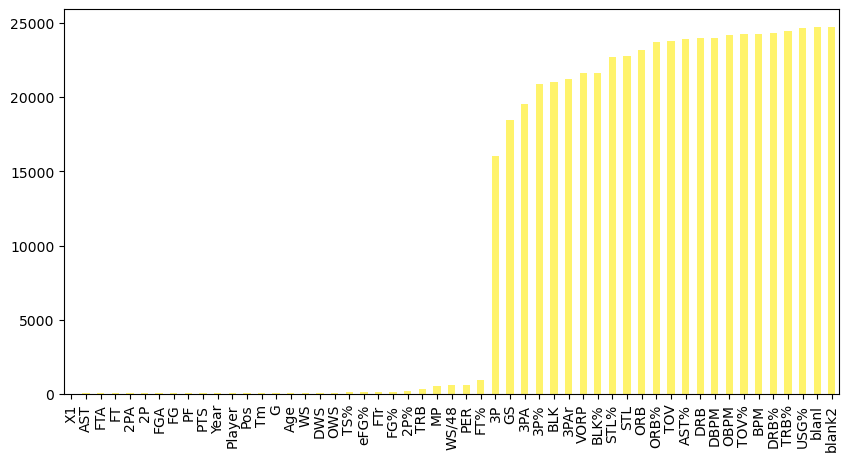

In [7]:
#Foi possível observar dados nulos nessa tabela, porém organizarei os dados para conseguir extrair as colunas desnecessárias
SeasonsStatsDF.isnull().sum().sort_values().plot(kind='bar', color = '#fff36b',figsize = (10,5))

Aqui é possivel observar que existem muitas colunas com dados nulos, desde a "3P" até a "blank2".

<AxesSubplot:>

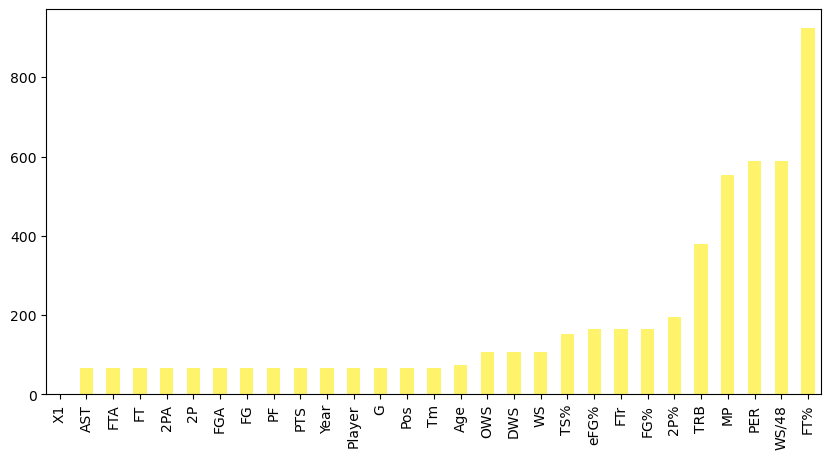

In [8]:
#Exluindo desde "FT%" para lá
SeasonsStatsDF.drop(["blank2","blanl","USG%","TRB%","DRB%","BPM","TOV%","OBPM","DBPM","DRB","AST%","TOV","ORB%","ORB","STL","STL%","BLK%","VORP","3PAr","BLK","3P%","3PA","GS","3P"], axis=1, inplace=True)
#Verificando o dataframe
SeasonsStatsDF.isnull().sum().sort_values().plot(kind='bar', color = '#fff36b',figsize = (10,5))

#### 3. Ano 2017; Porque vários jogadores aparecem várias vezes nesse ano?

In [9]:
#Voltanto para a tabela das temporadas
#É possível observar a simplesvista que tem jogadores repetidos, uma das pincipaís rspostas é que foram registrados em diferentes teams ("Tm")
JogadorRepetido = SeasonsStatsDF[SeasonsStatsDF['Year'] >= 2017.0].groupby(['Year','Player', 'Tm'])['Player'].count()
JogadorRepetido.duplicated().head(50)

Year    Player            Tm 
2017.0  A.J. Hammons      DAL    False
        Aaron Brooks      IND     True
        Aaron Gordon      ORL     True
        Aaron Harrison    CHO     True
        Adreian Payne     MIN     True
        Al Horford        BOS     True
        Al Jefferson      IND     True
        Al-Farouq Aminu   POR     True
        Alan Anderson     LAC     True
        Alan Williams     PHO     True
        Alec Burks        UTA     True
        Alex Abrines      OKC     True
        Alex Len          PHO     True
        Alex Poythress    PHI     True
        Alexis Ajinca     NOP     True
        Allen Crabbe      POR     True
        Alonzo Gee        DEN     True
        Amir Johnson      BOS     True
        Anderson Varejao  GSW     True
        Andre Drummond    DET     True
        Andre Iguodala    GSW     True
        Andre Roberson    OKC     True
        Andrew Bogut      CLE     True
                          DAL     True
                          TOT     

In [10]:
#Como a tabela é dos salários 17/18, não seria preciso filtrá-la
JogadorRepetidoS = NBASalaryDF['Player'].value_counts()
JogadorRepetidoS

DeAndre Liggins      3
Demetrius Jackson    3
Briante Weber        3
Jarell Eddie         3
Isaiah Canaan        3
                    ..
Josh McRoberts       1
Spencer Hawes        1
Joel Embiid          1
Ben Simmons          1
Beno Udrih           1
Name: Player, Length: 535, dtype: int64

In [11]:
#Tem jogadores repetidos também, olhando um caso em específico podemos concluir que aparece repetido pois esteve em vários teams
JogadorRepetidoS = NBASalaryDF.loc[(NBASalaryDF['Player'].isin(['Jarell Eddie']))]
JogadorRepetidoS

,X1,Player,Tm,season17_18
525,526.0,Jarell Eddie,BOS,83129.0
526,527.0,Jarell Eddie,CHI,83129.0
572,573.0,Jarell Eddie,CHI,17224.0


#### 4. Agrupação entre jogadores e seu respetivo sálario total e quantidade de pontos por ano.

In [12]:
#União das suas tabelas
NBA2017 = pd.merge(SeasonsStatsDF[SeasonsStatsDF['Year'] >= 2017.0],NBASalaryDF, on = ["Player","Tm"])
NBA2017.head()

,X1_x,Year,Player,Pos,Age,Tm,G,MP,PER,TS%,...,eFG%,FT,FTA,FT%,TRB,AST,PF,PTS,X1_y,season17_18
0,24096.0,2017.0,Alex Abrines,SG,23.0,OKC,68.0,1055.0,10.1,0.560,...,0.531,44.0,49.0,0.898,86.0,40.0,114.0,406.0,185.0,5725000.0
1,24099.0,2017.0,Quincy Acy,PF,26.0,BRK,32.0,510.0,13.1,0.587,...,0.542,43.0,57.0,0.754,107.0,18.0,58.0,209.0,350.0,1709538.0
2,24100.0,2017.0,Steven Adams,C,23.0,OKC,80.0,2389.0,16.5,0.589,...,0.571,157.0,257.0,0.611,615.0,86.0,195.0,905.0,32.0,22471910.0
3,24101.0,2017.0,Arron Afflalo,SG,31.0,SAC,61.0,1580.0,9.0,0.559,...,0.514,83.0,93.0,0.892,125.0,78.0,104.0,515.0,378.0,1500000.0
4,24102.0,2017.0,Alexis Ajinca,C,28.0,NOP,39.0,584.0,12.9,0.529,...,0.500,29.0,40.0,0.725,177.0,12.0,77.0,207.0,206.0,4961798.0


In [13]:
#Salarios por jogador
Salario17 = NBA2017.groupby(['Player'])['season17_18'].sum().sort_values()
Salario17

Player
Quinn Cook              25000.0
Beno Udrih              25000.0
Axel Toupane            25000.0
Daniel Ochefu           50000.0
Gary Payton             50000.0
                        ...    
Russell Westbrook    28530608.0
Mike Conley          28530608.0
Kyle Lowry           28703704.0
LeBron James         33285709.0
Stephen Curry        34682550.0
Name: season17_18, Length: 269, dtype: float64

In [14]:
#Pontos por jogador durante toda a carreira
SeasonsStatsDF.groupby(['Year','Player','Tm'])['PTS'].sum().sort_values()

Year    Player             Tm 
2016.0  Sam Dekker         HOU       0.0
1992.0  Steve Bardo        SAS       0.0
2001.0  Sean Colson        ATL       0.0
2017.0  Patricio Garino    ORL       0.0
1998.0  Jeff Grayer        CHH       0.0
                                   ...  
1964.0  Wilt Chamberlain*  SFW    2948.0
1961.0  Wilt Chamberlain*  PHW    3033.0
1987.0  Michael Jordan*    CHI    3041.0
1963.0  Wilt Chamberlain*  SFW    3586.0
1962.0  Wilt Chamberlain*  PHW    4029.0
Name: PTS, Length: 24623, dtype: float64